# SAMSum


In [3]:
import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer 

model = None
tokenizer = None
device = "cuda" if torch.cuda.is_available() else "cpu" 

with torch.no_grad():
    # model_ckpt = "google/pegasus-cnn_dailymail" 
    model_ckpt = '../../../resources/embedding/google_pegasus-cnn-dm'
    tokenizer = AutoTokenizer.from_pretrained(model_ckpt) 
    model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device) 

In [1]:
import datasets
# dataset_samsum = load_dataset("samsum") 
dataset_samsum = datasets.load_from_disk('../../../resources/dataset/hf_samsum/')
split_lengths = [len(dataset_samsum[split])for split in dataset_samsum] 
print(f"Split lengths: {split_lengths}") 
print(f"Features: {dataset_samsum['train'].column_names}") 
print("\nDialogue:") 
print(dataset_samsum["test"][0]["dialogue"]) 
print("\nSummary:") 
print(dataset_samsum["test"][0]["summary"])

/home/users/sunhongchao/miniconda3/envs/bot-mvp/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Split lengths: [14732, 819, 818]
Features: ['id', 'dialogue', 'summary']

Dialogue:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry.


Token indices sequence length is longer than the specified maximum sequence length for this model (530 > 512). Running this sequence through the model will result in indexing errors


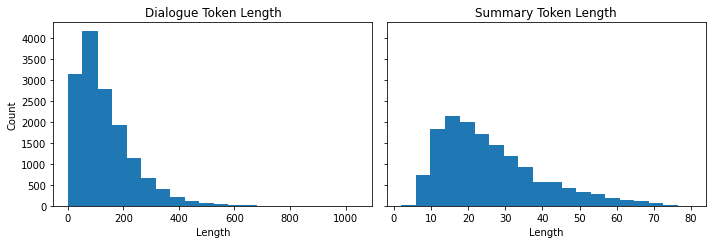

In [4]:
import matplotlib.pyplot as plt
d_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"] ["dialogue"]] 
s_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"]["summary"]] 
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
axes[0].hist(d_len, bins=20, color="C0", edgecolor="C0") 
axes[0].set_title("Dialogue Token Length") 
axes[0].set_xlabel("Length") 
axes[0].set_ylabel("Count") 
axes[1].hist(s_len, bins=20, color="C0", edgecolor="C0") 
axes[1].set_title("Summary Token Length") 
axes[1].set_xlabel("Length") 
plt.tight_layout() 

plt.show()